# Algoritmos de ordenamiento

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import sys

## Definición función `merge_sort`

In [51]:
def merge(left: np.array, right: np.array) -> np.array:
    res = list()
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            res = np.append(res, left[0])
            left = np.delete(left, 0)
        else:
            res = np.append(res, right[0])
            right = np.delete(right, 0)
    if len(left) == 0:
        return np.append(res, right)
    else:
        return np.append(res, left)


def merge_sort(arr: np.array) -> np.array:
    size = len(arr)
    if size < 2:
        return arr
    left, right =  arr[:size // 2], arr[size // 2:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)


## Definición función `quick_sort`

In [52]:
def partition(arr: np.array, low: int, high: int) -> int:
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr: np.array, low: int, high: int):
    if low < high:
        p = partition(arr, low, high)
        quick_sort(arr, low, p - 1)
        quick_sort(arr, p + 1, high)

## Medir los tiempos de los distintos algoritmos

Para problemas de tamaño $10^7$ y $10^8$ nuestras implementacion de `merge_sort` tarda demasiado por eso nos saltaremos esos pasos y solo ejecutaremos los demás.

In [53]:
sys.setrecursionlimit(1_000_000)

In [54]:
LIMIT = 8
SEP = '\t\t'
problem_size = np.array([10 ** i for i in range(1, LIMIT + 1)])
ms_times = list()
qs_times = list()
np_times = list()

print(*'size,numpy quick sort,merge sort      ,quick sort'.split(','), sep= SEP)

for j, i in enumerate(problem_size):
    array = np.random.randint(1, i, i)


    print(i, end= SEP)
    start = time.time()
    np.sort(array)
    np_times.append(time.time() - start)
    print(np_times[-1], end= SEP)

    if j > 5:
        ms_times.append(np.nan)
        print(ms_times[-1], end= SEP)
    else:
        start = time.time()
        merge_sort(array)
        ms_times.append(time.time() - start)
        print(ms_times[-1], end= SEP)

    start = time.time()
    quick_sort(array, 0, len(array) - 1)
    qs_times.append(time.time() - start)
    print(qs_times[-1])

size		numpy quick sort		merge sort      		quick sort
10		3.528594970703125e-05		0.0012898445129394531		1.71661376953125e-05
100		1.2636184692382812e-05		0.005417823791503906		0.000286102294921875
1000		5.459785461425781e-05		0.07667899131774902		0.0032570362091064453
10000		0.00040435791015625		0.9858307838439941		0.04618048667907715
100000		0.004994392395019531		15.740646600723267		0.5962085723876953
1000000		0.060030460357666016		1581.9560205936432		7.099131107330322


Guardar los tiempos en un data frame 

In [55]:
times_df = pd.DataFrame({
    'Tamaño del problema': problem_size,
    'MiMergeSort': ms_times,
    'MiQuickSort': qs_times,
    'NumpySort': np_times 
})
times_df

,Tamaño del problema,MiMergeSort,MiQuickSort,NumpySort
0,10,0.001290,0.000017,0.000035
1,100,0.005418,0.000286,0.000013
2,1000,0.076679,0.003257,0.000055
3,10000,0.985831,0.046180,0.000404
4,100000,15.740647,0.596209,0.004994
5,1000000,1581.956021,7.099131,0.060030


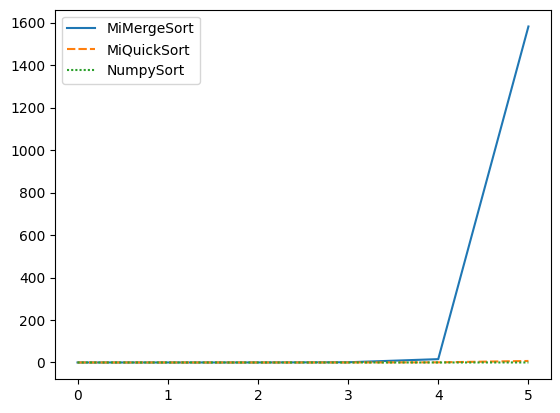

In [56]:
sns.lineplot(
    data= times_df[['MiMergeSort','MiQuickSort','NumpySort']],
    # x= '#problems',
    # y= ['merge', 'quick', 'numpy'],
    legend= True
)
!clear

In [57]:
with pd.ExcelWriter("TiemposOrdenamiento.xlsx") as writer:
    times_df.to_excel(writer, sheet_name='Hoja1')